# Proyek Analisis Data: Bike Sharing Dataset
- Kelompok : JOSU
- Anggota : </br>
10122352 - Muhammad Insani Imam Utomo</br>
10122353 - Krisnover Aritonang</br>
10122357 - Mohamad Trio Solehudin</br>
10122367 - Atam Kartam</br>
10122376 - A.shifa Muhammad Yusuf</br>
10122378 - Muhammad Raizidan Maliq

## Menentukan Pertanyaan Bisnis

- Berapakah Jumlah Peminjam Sepeda Terdaftar dan Casual pada Tahun 2012 Berdasarkan Bulan ?  - 10122367 - Atam Kartam
- Pengaruh Kecepatan Angin Terhadap Penggunaan Sepeda pada Hari Kerja pada Tahun 2011 Berdasarkan Bulan ? - 10122367 - Atam Kartam
- Teknik Analisis Lanjutan - 10122367 - Atam Kartam
- Berapakah Perkembangan Jumlah Penyewa Sepeda Seiring Waktu ? - 10122357 - Mohamad Trio Solehudin
- Bagaimana Perbedaan Jumlah Penyewa Sepeda antara Hari Kerja dan Hari Libur ? - 10122378 - Muhammad Raizidan Maliq
- Bagaimana Korelasi antara Suhu dan Jumlah Penyewa Sepeda ? - 10122376 - A.shifa Muhammad Yusuf
- Apakah Pengaruh Musim terhadap Jumlah Penyewa Sepeda ? - 10122352 - Muhammad Insani Imam Utomo
- Bagaimana Pengaruh Kondisi Cuaca terhadap Jumlah Penyewa Sepeda ? - 10122353 - Krisnover Aritonang

## Menyaipkan semua library yang dibuthkan

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

## Data Wrangling

### Gathering Data

In [91]:
df = pd.read_csv("day.csv")
display(df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

#### Memeriksa Missing Value atau Nilai Hilang

In [92]:
# Cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [93]:
#Definisikan format missing values yang mungkin ada
missing_value_format = ['N.A', 'na', 'n.a.','n/a','?','-']

#Tambahkan parameter na_values untuk memformat missing values
df = pd.read_csv('day.csv', na_values = missing_value_format)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [94]:
df.isna().values.any() #Memeriksa missing values untuk keseluruhan dataframe

False

In [95]:
df.isnull().values.any() #Memeriksa missing values untuk keseluruhan dataframe

False

In [96]:
df.isna().any() #Memeriksa missing values untuk tiap kolom

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [97]:
df.isnull().sum() #Memeriksa jumlah missing values di tiap kolom

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Memeriksa Duplikat Data

In [98]:
df.duplicated().values.any()

False

In [99]:
#Menampilkan semua baris data yang sama

df[df.duplicated(keep=False)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


#### Memeriksa Data Formatting

In [100]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Cleaning Data

Dari output di atas, terlihat semua fitur sepeti missing value, data duplikat dan data formatting sudah sesuai jika kita lihat datanya di dataframe, maka kita tidak perlu melakukan cleaning data pada dataset kali ini.

## Exploratory Data Analysis (EDA)

### Explore ...

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

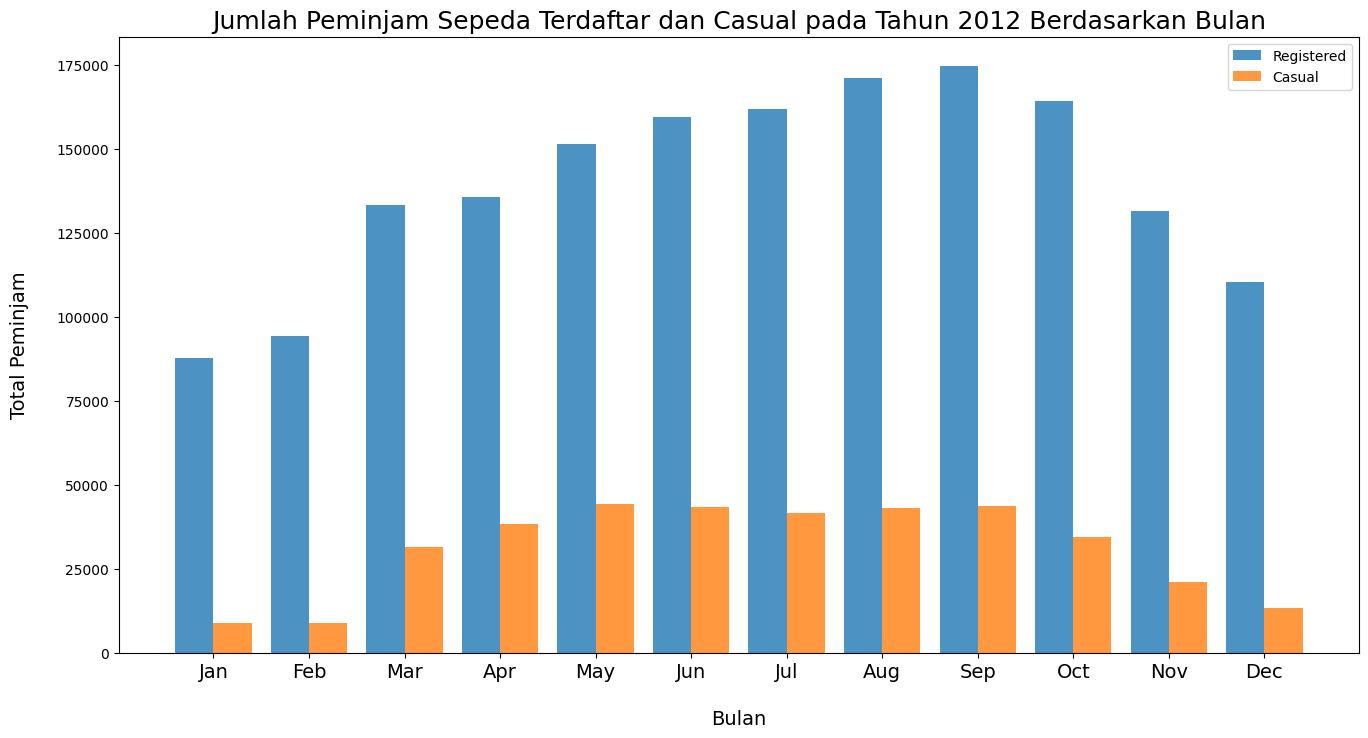

In [101]:
# Filter data untuk tahun 2012
df_2012 = df[(df['dteday'] >= '2012-01-01') & (df['dteday'] <= '2012-12-31')]

# Menghitung jumlah peminjam sepeda terdaftar dan acak berdasarkan bulan
df_monthly = df_2012.groupby('mnth')[['registered', 'casual']].sum().reset_index()

# Mengatur width bar
plt.figure(figsize=(16,8))
bar_width = 0.4

# Plotting barplot
plt.bar(df_monthly['mnth'] - bar_width/2, df_monthly['registered'], width=bar_width, label='Registered', alpha=0.8)
plt.bar(df_monthly['mnth'] + bar_width/2, df_monthly['casual'], width=bar_width, label='Casual', alpha=0.8)

# Menambahkan judul dan label pada sumbu
plt.title('Jumlah Peminjam Sepeda Terdaftar dan Casual pada Tahun 2012 Berdasarkan Bulan', size=18)
plt.xlabel('\nBulan', size=14)
plt.ylabel('Total Peminjam\n', size=14)

# Menambahkan label pada sumbu x berdasarkan nama bulan
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(df_monthly['mnth'], months, size=14)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

### Pertanyaan 2: 

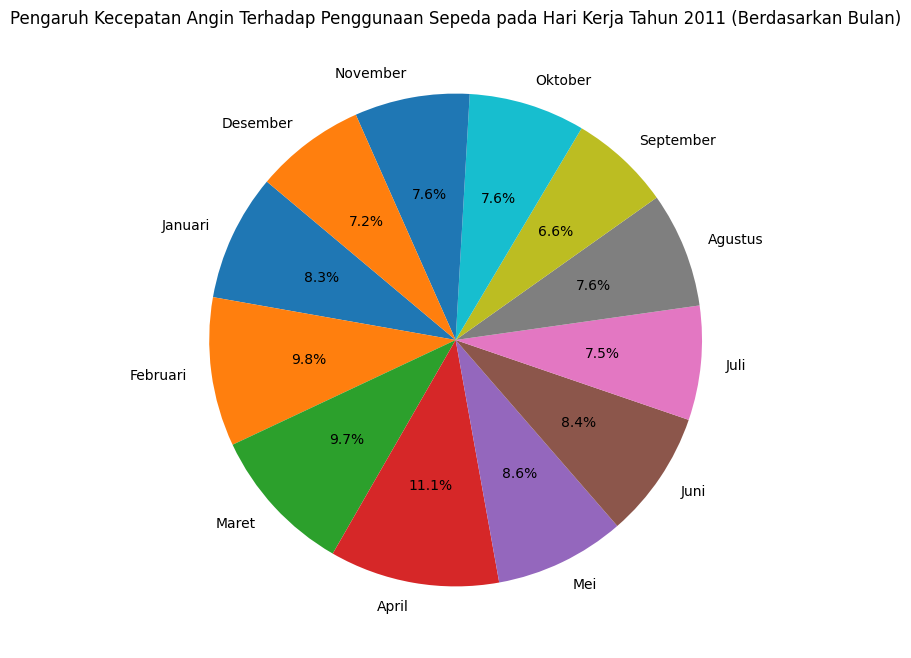

In [102]:
# Mapping nama bulan
bulan_map = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
             7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}

# Filter data untuk tahun 2011 dan hanya pada hari kerja
df_2011_weekday = df[(df['yr'] == 0) & (df['workingday'] == 1)]

# Group data berdasarkan bulan dan hitung rata-rata kecepatan angin
avg_wind_speed_by_month = df_2011_weekday.groupby('mnth')['windspeed'].mean()
avg_wind_speed_by_month.index = avg_wind_speed_by_month.index.map(bulan_map)

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(avg_wind_speed_by_month, labels=avg_wind_speed_by_month.index, autopct='%1.1f%%', startangle=140)
plt.title('Pengaruh Kecepatan Angin Terhadap Penggunaan Sepeda pada Hari Kerja Tahun 2011 (Berdasarkan Bulan)')
plt.show()

### Pertanyaan 3: 

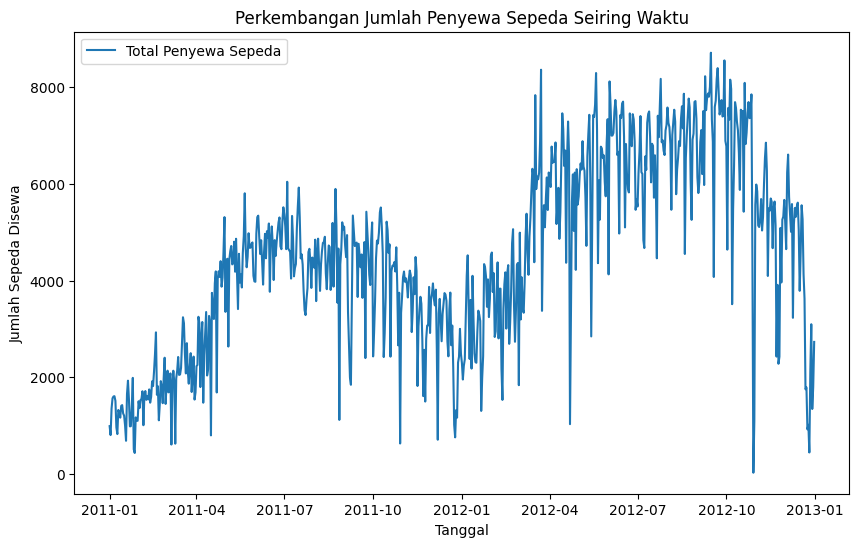

In [103]:
# Konversi kolom 'dteday' ke tipe data datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(df['dteday'], df['cnt'], label='Total Penyewa Sepeda')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Perkembangan Jumlah Penyewa Sepeda Seiring Waktu')
plt.legend()
plt.show()


### Pertanyaan 4: 

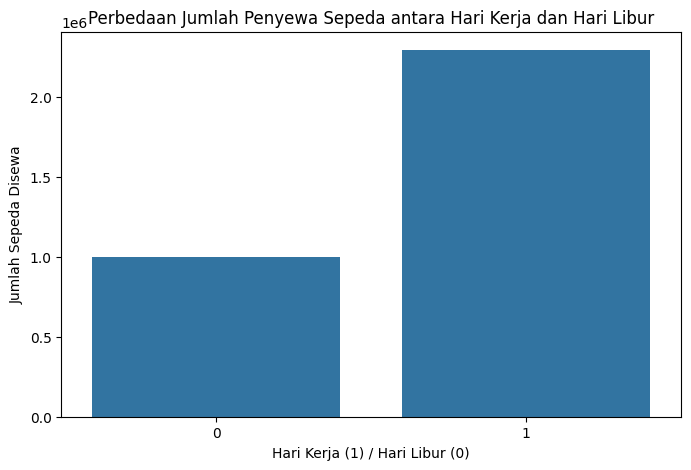

In [104]:
# Membuat bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='workingday', y='cnt', data=df, estimator=sum, errorbar=None)
plt.xlabel('Hari Kerja (1) / Hari Libur (0)')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Perbedaan Jumlah Penyewa Sepeda antara Hari Kerja dan Hari Libur')
plt.show()

### Pertanyaan 5: 

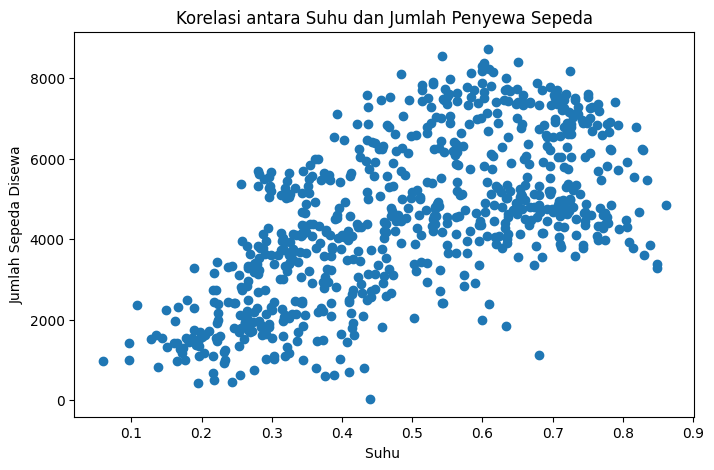

In [105]:
# Membuat scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(df['temp'], df['cnt'])
plt.xlabel('Suhu ')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Korelasi antara Suhu dan Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 6: 

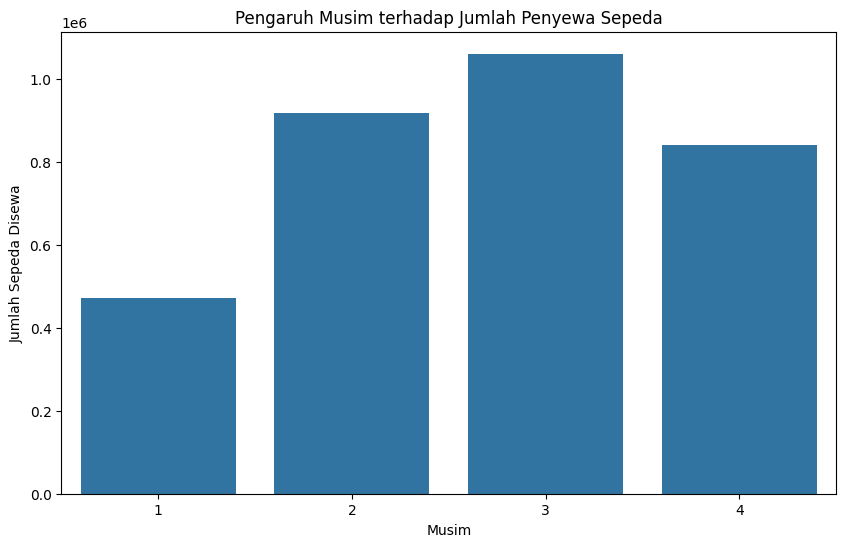

In [106]:
# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=df, estimator=sum, errorbar=None)
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Pengaruh Musim terhadap Jumlah Penyewa Sepeda')
plt.show()

### Pertanyaan 7: 

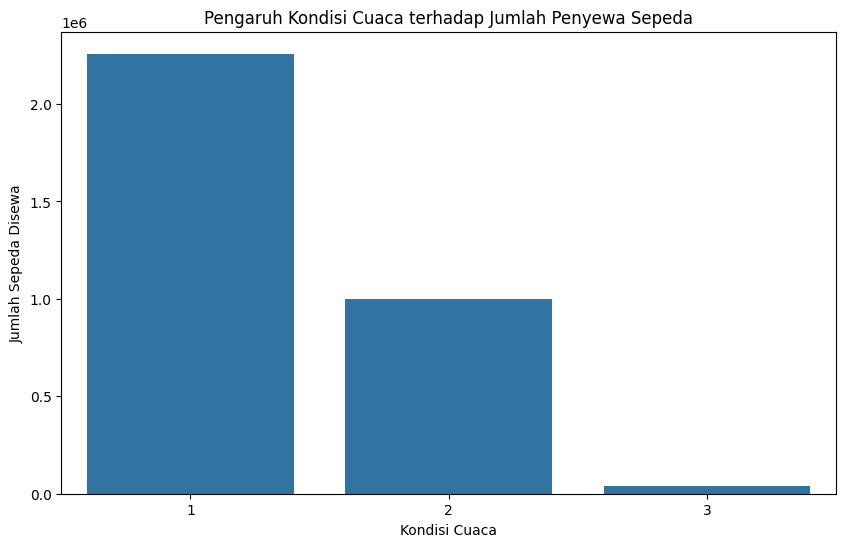

In [107]:
# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=df, estimator=sum, errorbar=None)
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewa Sepeda')
plt.show()

## Conclusion

- Conclution pertanyaan 1
Pada umumnya, jumlah peminjam sepeda terdaftar (Registered) lebih tinggi daripada peminjam sepeda acak (Casual) sepanjang tahun 2012. Puncak   aktivitas peminjaman terdaftar tampaknya terjadi pada bulan september dengan jumlah yaitu 174795 peminjam dan Puncak aktivitas peminjaman casual tampaknya terjadi pada bulan mei dengan jumlah yaitu 44235 peminjam, yang mungkin disebabkan oleh cuaca yang lebih hangat dan kondisi yang lebih baik untuk bersepeda. Dalam keseluruhan, peminjaman sepeda terdaftar cenderung lebih stabil dan dapat diprediksi, sementara peminjaman casual lebih bervariasi dan mungkin dipengaruhi oleh faktor-faktor seperti liburan atau cuaca yang tidak terduga.
- conclution pertanyaan 2
dapat disimpulkan bahwa kecepatan angin tidak memiliki pengaruh yang konsisten terhadap penggunaan sepeda. Meskipun terdapat variasi kecepatan angin dari bulan ke bulan, penggunaan sepeda cenderung tetap tinggi pada beberapa bulan meskipun kecepatan angin relatif tinggi. Temuan ini menunjukkan bahwa faktor-faktor lain, seperti cuaca atau suhu, mungkin juga berkontribusi terhadap pola penggunaan sepeda pada hari kerja.
- conclution pertanyaan 3
Melalui pemantauan perkembangan jumlah penyewa sepeda sepanjang waktu, terlihat bahwa terdapat kecenderungan peningkatan secara umum, meskipun dengan beberapa fluktuasi. Pola ini bisa mengindikasikan adanya tren musiman atau faktor-faktor lain yang berpengaruh pada keberlangsungan pertumbuhan tersebut.
- conclution pertanyaan 4
Analisis menunjukkan bahwa jumlah penyewa sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini kemungkinan besar dipengaruhi oleh kebutuhan transportasi sehari-hari pada hari kerja, sedangkan pada hari libur, aktivitas sepeda bisa lebih bersifat rekreasi.
- conclution pertanyaan 5
Korelasi positif antara suhu dan jumlah penyewa sepeda menarik untuk dicatat. Saat suhu meningkat, jumlah penyewa sepeda juga cenderung meningkat. Hal ini menunjukkan bahwa preferensi pengguna sepeda terkait dengan kondisi cuaca yang lebih hangat.
- conclution pertanyaan 6
Terlihat bahwa musim memengaruhi jumlah penyewa sepeda, dengan tingkat penggunaan yang lebih tinggi selama musim panas dan musim semi. Faktor iklim ini dapat menjadi pertimbangan penting dalam merencanakan layanan sepeda dan kebijakan pengembangan.
- conclution pertanyaan 7
Cuaca yang cerah atau berawan cenderung meningkatkan jumlah penyewa sepeda, sementara kondisi cuaca buruk dapat berdampak negatif. Kesimpulan ini memberikan gambaran holistik tentang bagaimana faktor-faktor lingkungan dan kegiatan sehari-hari berkontribusi terhadap pola penggunaan sepeda.

# Teknik Analisis Lanjutan

KMeans Clustering


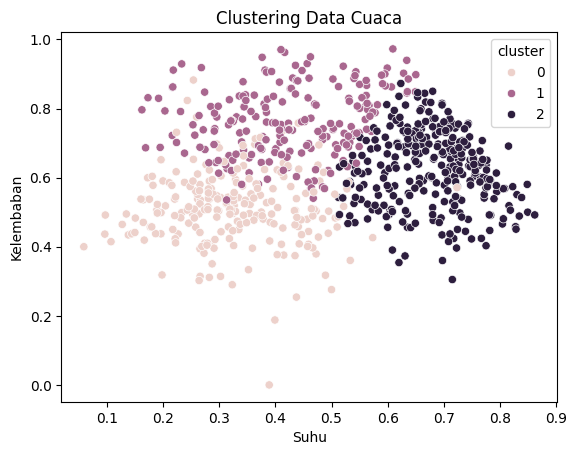

<hr>


In [108]:
# KMeans Clustering
print("KMeans Clustering")
X = df[['temp', 'atemp', 'hum', 'windspeed']]
X_normalized = (X - X.mean()) / X.std()
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(X_normalized)
df['cluster'] = kmeans.labels_
sns.scatterplot(x='temp', y='hum', hue='cluster', data=df)
plt.title('Clustering Data Cuaca')
plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.show()
print('<hr>') #hr Garis Pemisah

Seasonal Decomposition


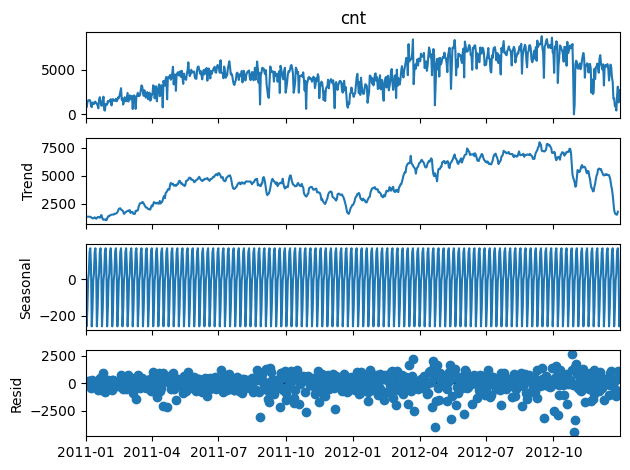

<hr>


In [109]:
# Bagian 2: Seasonal Decomposition
print("Seasonal Decomposition")
ts_data = df.set_index('dteday')['cnt']
decomposition = seasonal_decompose(ts_data, model='additive')
decomposition.plot()
plt.show()
print('<hr>') #hr Garis Pemisah

ARIMA Prediction


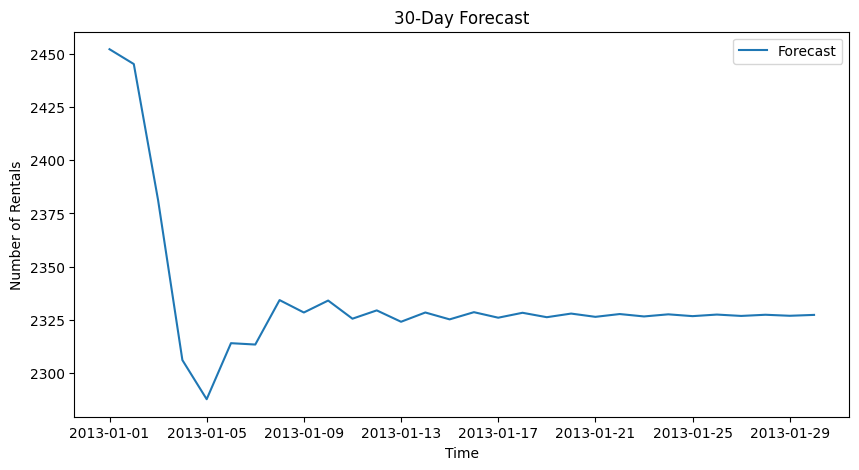

In [110]:
# Bagian 3: ARIMA Prediction
print("ARIMA Prediction")
# Memilih hanya kolom 'dteday' dan 'cnt' untuk analisis
df_time_series = df.set_index('dteday')['cnt']

# Menetapkan frekuensi 'D' saat membuat data time series
df_time_series.index.freq = 'D'

# Menggunakan model ARIMA dengan menentukan frekuensi
model = ARIMA(df_time_series, order=(5,1,2), freq='D')

model_fit = model.fit()

# Melakukan prediksi untuk 30 hari ke depan
forecast = model_fit.forecast(steps=30)  # Prediksi untuk 30 hari kedepan

# Visualisasi prediksi
plt.figure(figsize=(10, 5))
plt.plot(forecast, label='Forecast')
plt.title('30-Day Forecast')
plt.xlabel('Time')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()